<a href="https://colab.research.google.com/github/Spitzanity/Sports-Analytics---RST407/blob/main/Exercise_5_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6.1:

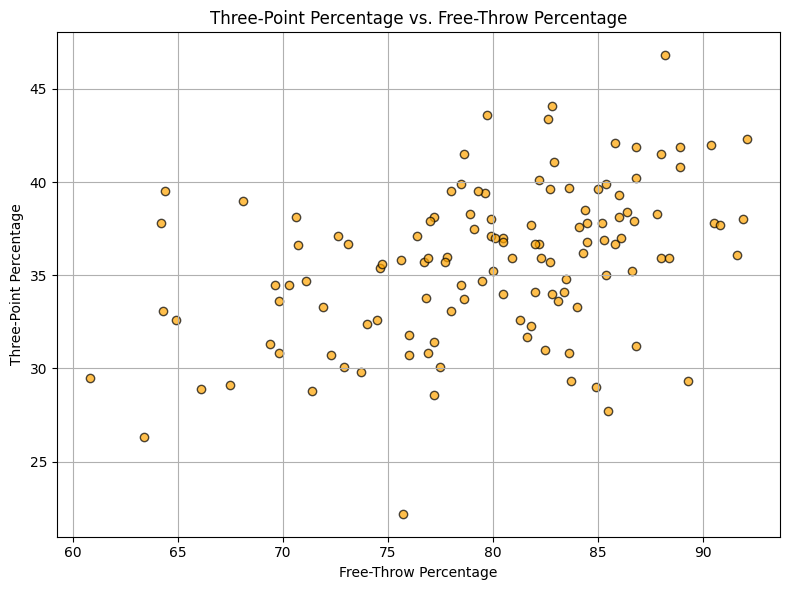

(b) Regression equation: T_PCT = 15.70 + 0.251 * FT_PCT
(c) Margin of Error for slope: ±0.097


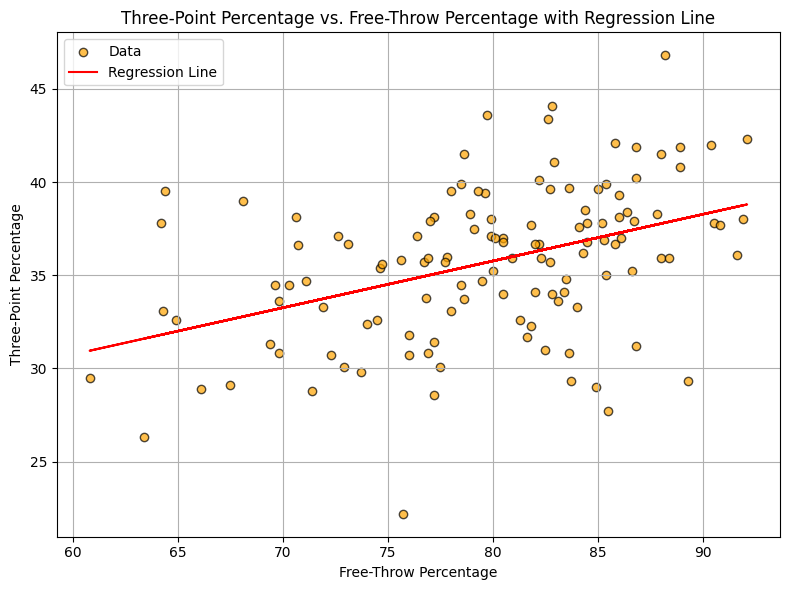

(e) Predicted Three-Point Percentages:
  FT% = 70% -> Predicted 3P% = 33.26%
  FT% = 80% -> Predicted 3P% = 35.76%
  FT% = 90% -> Predicted 3P% = 38.27%


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
file_path = "Dataset 6.7.xlsx"
df = pd.read_excel(file_path)

# (a) Scatter plot: Three-point percentage vs. Free-throw percentage
plt.figure(figsize=(8, 6))
plt.scatter(df['FT_PCT'], df['T_PCT'], alpha=0.7, color='orange', edgecolor='black')
plt.title("Three-Point Percentage vs. Free-Throw Percentage")
plt.xlabel("Free-Throw Percentage")
plt.ylabel("Three-Point Percentage")
plt.grid(True)
plt.tight_layout()
plt.show()

# (b) Fit OLS regression model: T_PCT ~ FT_PCT
X = df['FT_PCT']
y = df['T_PCT']
X_with_const = sm.add_constant(X)  # Adds intercept term
model = sm.OLS(y, X_with_const).fit()

# Print regression parameters
intercept = model.params['const']
slope = model.params['FT_PCT']
print(f"(b) Regression equation: T_PCT = {intercept:.2f} + {slope:.3f} * FT_PCT")

# (c) Margin of error for slope at 95% confidence level
slope_se = model.bse['FT_PCT']
margin_of_error = 1.96 * slope_se
print(f"(c) Margin of Error for slope: ±{margin_of_error:.3f}")

# (d) Add estimated regression line to scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['FT_PCT'], df['T_PCT'], alpha=0.7, label='Data', color='orange', edgecolor='black')
plt.plot(df['FT_PCT'], model.predict(X_with_const), color='red', label='Regression Line')
plt.title("Three-Point Percentage vs. Free-Throw Percentage with Regression Line")
plt.xlabel("Free-Throw Percentage")
plt.ylabel("Three-Point Percentage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# (e) Predictions for FT_PCT = 70, 80, 90
predict_df = pd.DataFrame({'const': 1, 'FT_PCT': [70, 80, 90]})
predicted_tpct = model.predict(predict_df)

# Display predictions
print("(e) Predicted Three-Point Percentages:")
for ft_pct, tp_pct in zip(predict_df['FT_PCT'], predicted_tpct):
    print(f"  FT% = {ft_pct}% -> Predicted 3P% = {tp_pct:.2f}%")


6.2:

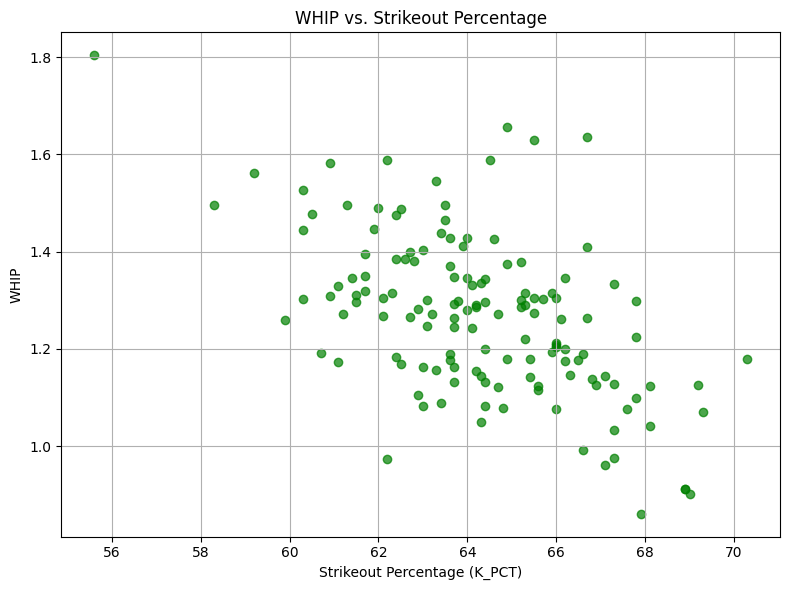

Regression equation: WHIP = 3.715 + -0.038 * K_PCT


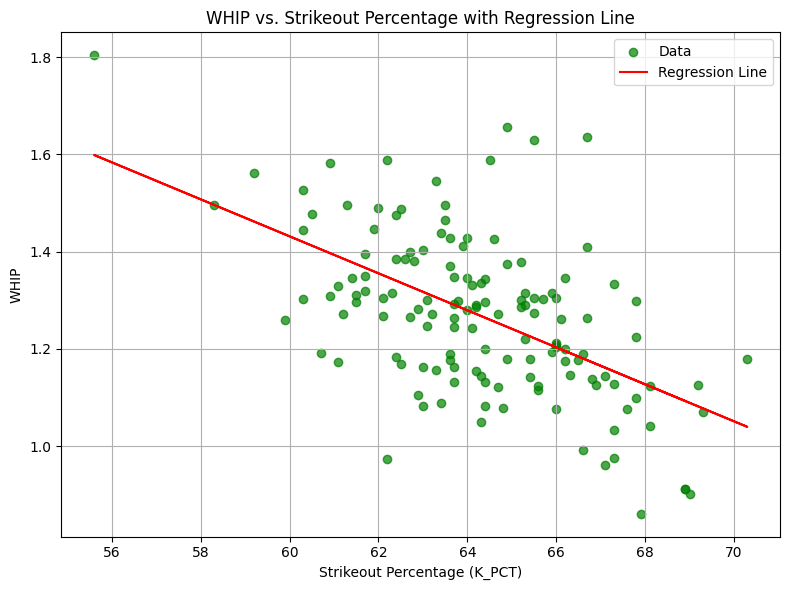

R-squared: 0.309
Predicted WHIP values:
  K_PCT = 60% -> WHIP = 1.432
  K_PCT = 65% -> WHIP = 1.241
  K_PCT = 70% -> WHIP = 1.051


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load Dataset 6.8
df = pd.read_excel("Dataset 6.8.xlsx")

# (a) Plot WHIP vs. Strikeout Percentage
plt.figure(figsize=(8, 6))
plt.scatter(df['K_PCT'], df['WHIP'], alpha=0.7, color='green')
plt.title("WHIP vs. Strikeout Percentage")
plt.xlabel("Strikeout Percentage (K_PCT)")
plt.ylabel("WHIP")
plt.grid(True)
plt.tight_layout()
plt.show()

# (b) Least-squares regression: WHIP ~ K_PCT
X = df['K_PCT']
y = df['WHIP']
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
intercept = model.params['const']
slope = model.params['K_PCT']
print(f"Regression equation: WHIP = {intercept:.3f} + {slope:.3f} * K_PCT")

# (c) Plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['K_PCT'], df['WHIP'], alpha=0.7, color='green', label="Data")
plt.plot(df['K_PCT'], model.predict(X_with_const), color='red', label="Regression Line")
plt.title("WHIP vs. Strikeout Percentage with Regression Line")
plt.xlabel("Strikeout Percentage (K_PCT)")
plt.ylabel("WHIP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# (d) R-squared value
r_squared = model.rsquared
print(f"R-squared: {r_squared:.3f}")

# (e) Predictions for K_PCT = 60, 65, 70
predict_df = pd.DataFrame({'const': 1, 'K_PCT': [60, 65, 70]})
predicted_whip = model.predict(predict_df)

print("Predicted WHIP values:")
for k, w in zip(predict_df['K_PCT'], predicted_whip):
    print(f"  K_PCT = {k}% -> WHIP = {w:.3f}")

6.5 (a-d):

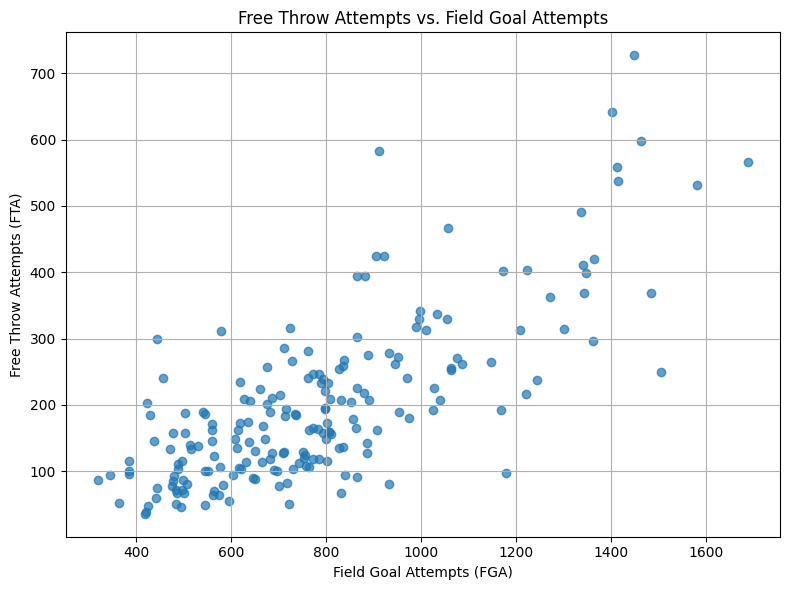

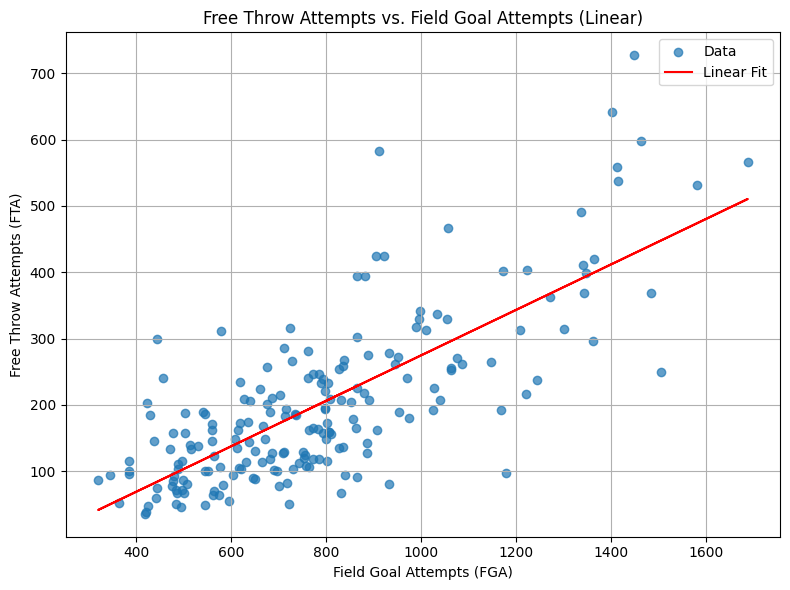

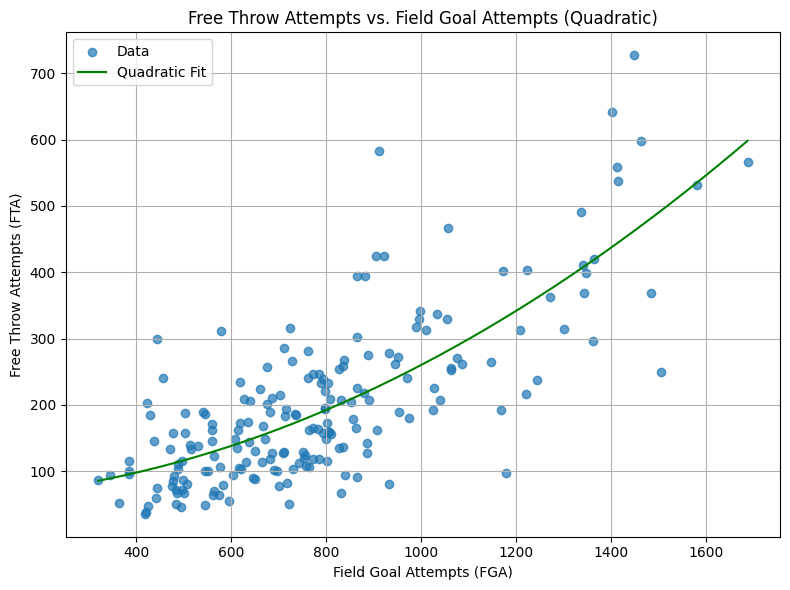

                            OLS Regression Results                            
Dep. Variable:                    FTA   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     259.5
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           1.48e-37
Time:                        19:30:09   Log-Likelihood:                -1136.4
No. Observations:                 195   AIC:                             2277.
Df Residuals:                     193   BIC:                             2283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.9482     17.738     -3.831      0.0

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Load and clean data
df = pd.read_excel("Dataset 6.10.xlsx")
df.columns = df.columns.str.strip()  # Strip extra spaces

# Extract variables
X = df['FGA']
y = df['FTA']

# (a) Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7)
plt.title("Free Throw Attempts vs. Field Goal Attempts")
plt.xlabel("Field Goal Attempts (FGA)")
plt.ylabel("Free Throw Attempts (FTA)")
plt.grid(True)
plt.tight_layout()
plt.show()

# (b) Linear regression
X_linear = sm.add_constant(X)
model_linear = sm.OLS(y, X_linear).fit()

# Plot linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label="Data")
plt.plot(X, model_linear.predict(X_linear), color='red', label="Linear Fit")
plt.title("Free Throw Attempts vs. Field Goal Attempts (Linear)")
plt.xlabel("Field Goal Attempts (FGA)")
plt.ylabel("Free Throw Attempts (FTA)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# (c) Quadratic regression
df['FGA_squared'] = df['FGA'] ** 2
X_quad = sm.add_constant(df[['FGA', 'FGA_squared']])
model_quad = sm.OLS(y, X_quad).fit()

# (d) Plot quadratic fit
fga_vals = np.linspace(X.min(), X.max(), 200)
fga_sq_vals = fga_vals ** 2
X_quad_pred = sm.add_constant(pd.DataFrame({'FGA': fga_vals, 'FGA_squared': fga_sq_vals}))
y_quad_pred = model_quad.predict(X_quad_pred)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(fga_vals, y_quad_pred, color='green', label='Quadratic Fit')
plt.title("Free Throw Attempts vs. Field Goal Attempts (Quadratic)")
plt.xlabel("Field Goal Attempts (FGA)")
plt.ylabel("Free Throw Attempts (FTA)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print model summaries (optional, comment if not needed)
print(model_linear.summary())
print(model_quad.summary())


The quadratic fit curves upward, better capturing the increase in FTA among high-volume shooters.

The quadratic model performs slightly better in terms of fit (R²), and the significant squared term justifies its inclusion.

Conclusion: The relationship between field goal attempts and free throw attempts is nonlinear, and the quadratic model captures it more accurately than the linear model.



6.7:

In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load and inspect the dataset
df = pd.read_excel("Dataset 6.12.xlsx")
df.columns = df.columns.str.strip()

# (a) Define predictor (X = previous season wins) and response (Y = current season wins)
X = df['Prev']
y = df['Wins']

# Add constant to predictor and fit linear regression
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

# Extract coefficients
intercept = model.params['const']
slope = model.params['Prev']
print(f"(a) Regression Equation: Wins = {intercept:.2f} + {slope:.3f} * Prev")

# (b) Make predictions for specified previous win totals
X_new = pd.DataFrame({'const': 1, 'Prev': [60, 70, 81, 90, 100]})
predicted = model.predict(X_new)

# Print predictions
print("\n(b) Predicted Wins:")
for prev, win in zip(X_new['Prev'], predicted):
    print(f"  Previous Wins = {prev} -> Predicted Current Wins = {win:.2f}")

# (c) Interpretation
print("\n(c) Interpretation:")
print("The slope is less than 1, meaning teams with very high or low previous wins are predicted")
print("to regress toward the mean (~.500 record or ~81 wins). This is evidence of regression to the mean.")


(a) Regression Equation: Wins = 34.20 + 0.578 * Prev

(b) Predicted Wins:
  Previous Wins = 60 -> Predicted Current Wins = 68.87
  Previous Wins = 70 -> Predicted Current Wins = 74.65
  Previous Wins = 81 -> Predicted Current Wins = 81.00
  Previous Wins = 90 -> Predicted Current Wins = 86.20
  Previous Wins = 100 -> Predicted Current Wins = 91.98

(c) Interpretation:
The slope is less than 1, meaning teams with very high or low previous wins are predicted
to regress toward the mean (~.500 record or ~81 wins). This is evidence of regression to the mean.
